In [5]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%autoreload 2

In [7]:
from utilities import node2tree
import shuntingyard as sy
import importlib
from IPython.display import Math as show_latex

In [8]:
from semplificatore import Semplificatore as smp

In [9]:
test_expr = "1 + {2 * [(3 + 4 : 2) + 5] * 6} - [7 + (1 + 8) : 3] * [9 : (2 + 1) + 2]#"
test_pow = "2^(3+4^5:2^7)#"
test_frac_1 = "(2+4)/(3+4)#"
test_riassuntivo = "3 + 13 * -(1+3) / (2^(1+4) - 6)#"
test_parentesi_semplice = "3/(4+2) + 2 * {3:(4+5) + 2^(6*1/2)}-(2*[5*(3+4)+5]-1)/6#"
test_parentesi_libere = "3/(4+2) + 2 * (3:(4+5) + 2^(6*1/2))-(2*(5*(3+4)+5)-1)/6#"
test_parentesi_libere2 = "3/(4+2) + 2 * (3:(4+5) : 2^(6*1/2))-(2*(5*(3+4)+5)-1)/6#"
test_rapido = "3 + 3 + 8 + 6 * 2#"
test_segni_unari_multipli = "---3 + (-56) / (-(-(-(5))))#"
test_lungo = "-19 + 4 * 45 / {12^[3+60/6:5] - 7/4 + 3 * (13 - 5 * -2^3)} * 22 / 143 - [13^2/45*3+3/(7+3^2)] : 3 - 1 + {12^(3+4)/12 + [5 - 3*4 + -(4^(9/3))]}#"
test_frac_exp = "(4/9)^(1/2)"
casi_potenze = ["-2^(-2)", "(1/2)^3", "3^(2*1/2)", "2^[8/4]"]

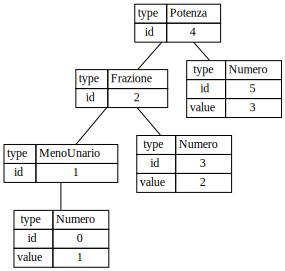

In [12]:
n = sy.parse_expr("(-1/2)^3", 'Q')
simpler = smp(n)
node2tree(n)

In [13]:
texts = simpler.solve()
text = '\\\\&'.join(texts)
text = "\\begin{align}" + text + "\end{align}"
show_latex(text)

<IPython.core.display.Math object>

In [12]:
def string2latex(s):
    n = sy.parse_expr(s, 'Q')
    simpler = smp(n)
    texts = simpler.solve()
    text = '\\\\&'.join(texts)
    text = "\\begin{align}" + text + "\end{align}"
    return text

In [13]:
casi_semplici = ["(2+4)/(3+4)#", "2/3/4#", "5/(6/7)#", "(2*3+4)/5#", "2/(3+4/5)#", "(((2+3)/4)/(5+6))/7#"]
potenze = ["-2^(-2)", "(1/2)^3"] 

In [14]:
lista_di_latex = []
for t in potenze:
    lista_di_latex.append(string2latex(t))
    print(t, "ok")

-2^(-2) ok
(1/2)^3 ok


In [15]:
show_latex(lista_di_latex[1])

<IPython.core.display.Math object>

In [15]:
import simplicio

In [17]:
casi_N_ok = ["15 * 3 + 2 : 2", "15 - 4 - (3*3)", "1 * 4 - 8 + 5 - 2 + 3", "2^3", "4 / (2 * 2)"]
casi_N_non_ok = ["-2", "4 - 8", "2^(-1)", "2^(1-2)", "3/4", "3 : 4"]

In [18]:
txts = []
for c in casi_N_ok:
    txts.append(simplicio.string2latex(c, 'N'))
    print(c, "ok")

15 * 3 + 2 : 2 ok
15 - 4 - (3*3) ok
1 * 4 - 8 + 5 - 2 + 3 ok
2^3 ok
4 / (2 * 2) ok


In [16]:
show_latex(simplicio.string2latex("-1 + 2^3 + 12:3", 'Z'))

<IPython.core.display.Math object>

In [20]:
show_latex(simplicio.string2latex("3 + 13 * ~(1+3) / (2^(1+4) - 6)",'Q'))

<IPython.core.display.Math object>

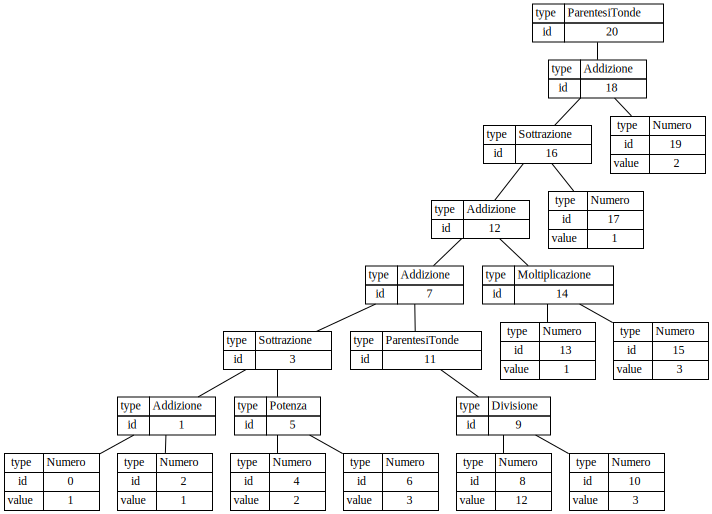

In [21]:
n= sy.parse_expr("(1 + 1 - 2^3 + (12:3) + 1 *3-1+2)",'Q')
simpler = smp(n)
node2tree(n)

In [22]:
show_latex(simplicio.string2latex("(1 + 1 - 2^3 + (12:3) + 1 *3-1+2)", 'Q'))

<IPython.core.display.Math object>

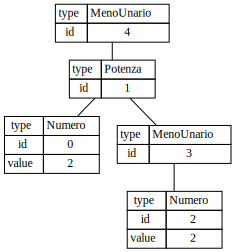

In [23]:
n= sy.parse_expr("-2^(-2)",'Q')
simpler = smp(n)
node2tree(n)

In [24]:
show_latex(simplicio.string2latex("-2^(-2)", 'Q'))

<IPython.core.display.Math object>

In [68]:
tutti_i_casi_testati = [
    "1 + {2 * [(3 + 4 : 2) + 5] * 6} - [7 + (1 + 8) : 3] * [9 : (2 + 1) + 2]#",
    "3 + 13 * ~(1+3) / (2^(1+4) - 6)#",
    "3/(4+2) + 2 * {3:(4+5) + 2^(6*1/2)}-(2*[5*(3+4)+5]-1)/6#",
    "3/(4+2) + 2 * (3:(4+5) + 2^(6*1/2))-(2*(5*(3+4)+5)-1)/6#",
    "3/(4+2) + 2 * (3:(4+5) : 2^(6*1/2))-(2*(5*(3+4)+5)-1)/6#",
    "{3-4*(2+6^[13 + 2])}",
    "3 + 3 + 8 + 6 * 2 ^ 3#",
    "---3 + -56 / -(-(-(5)))#",
    "2^(3+4^5:2^7)#", "(2+4)/(3+4)#", "2/3/4#", "5/(6/7)#", 
    "(2*3+4)/5#", "2/(3+4/5)#", "(((2+3)/4)/(5+6))/7#",
    "-2^(-2)", "(1/2)^3", "3^(2*1/2)", "2^[8/4]",
    "1/2/3", "1/2/3/4", "(1/2)/(3/4)", "4/1",
    "15 * 3 + 2 : 2", "15 - 4 - (3*3)", 
    "1 * 4 - 8 + 5 - 2 + 3", "2^3", "4 / (2 * 2)",
    "-2", "4 - 8", "2^(-1)", "2^(1-2)", "3/4", "3 : 4",
    "15 * 3 + 2 : 2", "15 - 4 - (3*3)", "1 * 4 - 8 + 5 - 2 + 3", "2^3", "4 / (2 * 2)",
    "-2", "4 - 8",
    "2^(-1)", "2^(1-2)", "3/4", "3 : 4",
]

casi_R = [
    "2^(1/2)",
    "4 - (8.2e1 + 5 - .2 * 3)",
    "4 + (8.2e1 + 5 - 2 * 3)",
    "4 + (8.2e1 + 5 - .2 * 3)"
]

In [78]:
txts = []
for c in tutti_i_casi_testati:
    txts.append(simplicio.string2latex(c, 'Q'))
    print(c, "ok")

1 + {2 * [(3 + 4 : 2) + 5] * 6} - [7 + (1 + 8) : 3] * [9 : (2 + 1) + 2]# ok
3 + 13 * ~(1+3) / (2^(1+4) - 6)# ok
3/(4+2) + 2 * {3:(4+5) + 2^(6*1/2)}-(2*[5*(3+4)+5]-1)/6# ok
3/(4+2) + 2 * (3:(4+5) + 2^(6*1/2))-(2*(5*(3+4)+5)-1)/6# ok
3/(4+2) + 2 * (3:(4+5) : 2^(6*1/2))-(2*(5*(3+4)+5)-1)/6# ok
{3-4*(2+6^[13 + 2])} ok
3 + 3 + 8 + 6 * 2 ^ 3# ok
---3 + -56 / -(-(-(5)))# ok
2^(3+4^5:2^7)# ok
(2+4)/(3+4)# ok
2/3/4# ok
5/(6/7)# ok
(2*3+4)/5# ok
2/(3+4/5)# ok
(((2+3)/4)/(5+6))/7# ok
-2^(-2) ok
(1/2)^3 ok
3^(2*1/2) ok
2^[8/4] ok
1/2/3 ok
1/2/3/4 ok
(1/2)/(3/4) ok
4/1 ok
15 * 3 + 2 : 2 ok
15 - 4 - (3*3) ok
1 * 4 - 8 + 5 - 2 + 3 ok
2^3 ok
4 / (2 * 2) ok
-2 ok
4 - 8 ok
2^(-1) ok
2^(1-2) ok
3/4 ok
3 : 4 ok
15 * 3 + 2 : 2 ok
15 - 4 - (3*3) ok
1 * 4 - 8 + 5 - 2 + 3 ok
2^3 ok
4 / (2 * 2) ok
-2 ok
4 - 8 ok
2^(-1) ok
2^(1-2) ok
3/4 ok
3 : 4 ok


In [101]:
show_latex(txts[33])

<IPython.core.display.Math object>

In [75]:
show_latex(simplicio.string2latex('(1/2)/(3/4)', 'Q'))

<IPython.core.display.Math object>